# Should this loan be approved or denied?

## Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [3]:
data = pd.read_csv('SBA_loans_project_1.zip')

In [4]:
print("Data shape:", data.shape)

Data shape: (809247, 21)


**Review dataset**

In [5]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,809247,int64,1,6,"{0: 1, 539491: 1, 539493: 1, 539494: 1, 539495..."
1,City,31320,object,1,30,"{'LOS ANGELES': 10372, 'HOUSTON': 9260, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 117341, 'TX': 63425, 'NY': 51877, 'FL':..."
3,Zip,32731,int64,1,5,"{10001: 841, 90015: 830, 93401: 729, 90010: 65..."
4,Bank,5716,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78111, 'WELLS F..."
5,BankState,55,object,2,3,"{'CA': 106293, 'NC': 71557, 'IL': 59258, 'OH':..."
6,NAICS,1307,int64,1,6,"{0: 181845, 722110: 25217, 722211: 17476, 8111..."
7,Term,407,int64,1,3,"{84: 207228, 60: 80965, 240: 77385, 120: 69852..."
8,NoEmp,581,int64,1,4,"{1: 138836, 2: 124470, 3: 81466, 4: 66306, 5: ..."
9,NewExist,3,float64,3,3,"{1.0: 580478, 2.0: 227709, 0.0: 932}"


## Dataset preparation and clean-up




In [6]:
data.head()

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,"$743,000.00",$0.00,"$743,000.00","$743,000.00",P I F
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,"$137,000.00",$0.00,"$137,000.00","$109,737.00",P I F
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,"$280,000.00",$0.00,"$280,000.00","$210,000.00",P I F
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,"$144,500.00",$0.00,"$144,500.00","$122,825.00",P I F
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,"$52,500.00",$0.00,"$52,500.00","$42,000.00",P I F


In [7]:
data.isna().sum()

index                   0
City                   25
State                  12
Zip                     0
Bank                 1405
BankState            1411
NAICS                   0
Term                    0
NoEmp                   0
NewExist              128
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4094
LowDoc               2319
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status           1822
dtype: int64

In [8]:
# Converting target variable as categorical [PIF = 0, CHGOFF = 1]
data['MIS_Status'] = [1 if i == 'CHGOFF' else 0 for i in data.MIS_Status.values]

In [9]:
data.groupby(by = "MIS_Status")["MIS_Status"].count()

MIS_Status
0    667398
1    141849
Name: MIS_Status, dtype: int64

In [10]:
# Encode categorical null values with "unknown" and numeric with 0
# Impute missing target variable with mode = 0 
values_to_fill = {}

for col in data.columns:
    if data[col].isna().any() == True:
        print("Processing column and column type:", col,data[col].dtype)
        
        if pd.api.types.is_numeric_dtype(data[col].dtype):
            values_to_fill[col] = 0
        else:
            values_to_fill[col] = "Unknown"
            
data.fillna(value = values_to_fill, inplace = True)

Processing column and column type: City object
Processing column and column type: State object
Processing column and column type: Bank object
Processing column and column type: BankState object
Processing column and column type: NewExist float64
Processing column and column type: RevLineCr object
Processing column and column type: LowDoc object


In [11]:
data.isna().sum()

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [12]:
# Convert strings input of '$XXXXX.XX' to float values (Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv'])
data['DisbursementGross'] = data['DisbursementGross'].str.replace('$', '').str.replace(',','')
data['DisbursementGross'] = pd.to_numeric(data['DisbursementGross'])

data['BalanceGross'] = data['BalanceGross'].str.replace('$', '').str.replace(',','')
data['BalanceGross'] = pd.to_numeric(data['BalanceGross'])

data['GrAppv'] = data['GrAppv'].str.replace('$', '').str.replace(',','')
data['GrAppv'] = pd.to_numeric(data['GrAppv'])

data['SBA_Appv'] = data['SBA_Appv'].str.replace('$', '').str.replace(',','')
data['SBA_Appv'] = pd.to_numeric(data['SBA_Appv'])

## Categorical and numerical variables encoding




In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
# Split dataset into train, test and validation 
x = data.drop('MIS_Status', axis = 1)
y = data['MIS_Status']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [15]:
print("Training set:", len(X_train))
print("Validation set:", len(X_valid))
print("Test set:", len(X_test))

Training set: 453177
Validation set: 113295
Test set: 242775


# Feature engineering


Outstanding balance is the ratio between balance gross and disbursement gross. This measure will check if there is any relationship between high outstanding ratio and probability of default 

In [16]:
# Fit outstanding balance ratio on training set
X_train['OutstandingBalance'] = X_train['BalanceGross']/X_train['DisbursementGross']

# Transform outstanding balance ratio on validation and test set
X_valid['OutstandingBalance'] = X_valid['BalanceGross']/X_valid['DisbursementGross']
X_test['OutstandingBalance'] = X_test['BalanceGross']/X_test['DisbursementGross']

Converting all businesses which are not franchise with 0 and all businesses which are franchise with 1

In [17]:
# Convert 0 for not franchise and 1 for franchise
# Fit categorical values in train dataset
X_train['IsFranchise'] = X_train['FranchiseCode'].apply(lambda x: 0 if x in [0,1] else 1)
X_train = X_train.drop(['FranchiseCode'], axis = 1)

# Transform categorical values in test dataset
X_test['IsFranchise'] = X_test['FranchiseCode'].apply(lambda x: 0 if x in [0,1] else 1)
X_test = X_test.drop(['FranchiseCode'], axis = 1)

# Transform categorical values in validation dataset
X_valid['IsFranchise'] = X_valid['FranchiseCode'].apply(lambda x: 0 if x in [0,1] else 1)
X_valid = X_valid.drop(['FranchiseCode'], axis = 1)

SBA approval rate is the ratio of loan approved by SBA divided by the gross approved loan amount

In [18]:
# Fit SBA approval rate on training set
X_train['SBAAppvRate'] = X_train['SBA_Appv']/X_train['GrAppv']

# Transform SBA approval rate on validation set
X_valid['SBAAppvRate'] = X_valid['SBA_Appv']/X_valid['GrAppv']

# Transform SBA approval rate on testing set
X_test['SBAAppvRate'] = X_test['SBA_Appv']/X_test['GrAppv']

Disbursement rate is the ratio of disbursement gross divided by the gross approved loan 

In [19]:
# Fit disbursement rate on training set
X_train['DisbursementRate'] = X_train['DisbursementGross']/X_train['GrAppv']

# Transform disbursement rate on validation set
X_valid['DisbursementRate'] = X_valid['DisbursementGross']/X_valid['GrAppv']

# Transform disbursement rate on test set
X_test['DisbursementRate'] = X_test['DisbursementGross']/X_test['GrAppv']

Job loss measures how many employees lost jobs that is calculated by addition of the existing no. of employees, created jobs and subtracting retained jobs. If the value is negative, it means the company had to let go employees, whereas positive value means the company created more jobs for employees

In [20]:
# Fit Job loss feature on training data
X_train['JobLoss'] = X_train['NoEmp'] + X_train['CreateJob'] - X_train['RetainedJob']
X_train['JobLoss'] = X_train['JobLoss'].apply(lambda x: 1 if x < 0 else 0 )

# Tranform Job loss feature on validation data
X_valid['JobLoss'] = X_valid['NoEmp'] + X_valid['CreateJob'] - X_valid['RetainedJob']
X_valid['JobLoss'] = X_valid['JobLoss'].apply(lambda x: 1 if x < 0 else 0 )

# Transform Job loss feature on test data
X_test['JobLoss'] = X_test['NoEmp'] + X_test['CreateJob'] - X_test['RetainedJob']
X_test['JobLoss'] = X_test['JobLoss'].apply(lambda x: 1 if x < 0 else 0 )

We will categorize term into short term, medium term and long term loans. Short term loans mean term < 18, medium term means 18 <= term <= 60 and long term means term > 60. We will assign short term = 1, else 0; medium term = 1, else 0 and long term = 1, else 0

In [21]:
# Fit short, medium and long term loans in training data
X_train['ShortTerm'] = X_train['Term'].apply(lambda x: 1 if x < 18 else 0)
X_train['MediumTerm'] = X_train['Term'].apply(lambda x: 1 if 18 <= x <= 60 else 0)
X_train['LongTerm'] = X_train['Term'].apply(lambda x: 1 if x > 60 else 0)

# Tranform short, medium and long term loans in validation data
X_valid['ShortTerm'] = X_valid['Term'].apply(lambda x: 1 if x < 18 else 0)
X_valid['MediumTerm'] = X_valid['Term'].apply(lambda x: 1 if 18 <= x <= 60 else 0)
X_valid['LongTerm'] = X_valid['Term'].apply(lambda x: 1 if x > 60 else 0)

# Transform short, medium and long term loans in test data
X_test['ShortTerm'] = X_test['Term'].apply(lambda x: 1 if x < 18 else 0)
X_test['MediumTerm'] = X_test['Term'].apply(lambda x: 1 if 18 <= x <= 60 else 0)
X_test['LongTerm'] = X_test['Term'].apply(lambda x: 1 if x > 60 else 0)


In [22]:
X_train = X_train.drop(['Term'], axis=1)
X_test = X_test.drop(['Term'], axis=1)
X_valid = X_valid.drop(['Term'], axis=1)

Next, we will categorize loan amount into small, medium and large loan based on the gross disbursement amount. Small loans means less than $100,000, medium loan means $100,000 to $450,000 and
large loan means greater than $450,000

In [23]:
# Fit short, medium and large loans category into training data
X_train['SmallLoan'] = X_train['DisbursementGross'].apply(lambda x: 1 if x < 100000 else 0)
X_train['MediumLoan'] = X_train['DisbursementGross'].apply(lambda x: 1 if 100000 <= x <= 450000 else 0)
X_train['LargeLoan'] = X_train['DisbursementGross'].apply(lambda x: 1 if x > 450000 else 0)

# Transform short, medium and large loans category into test data
X_test['SmallLoan'] = X_test['DisbursementGross'].apply(lambda x: 1 if x < 100000 else 0)
X_test['MediumLoan'] = X_test['DisbursementGross'].apply(lambda x: 1 if 100000 <= x <= 450000 else 0)
X_test['LargeLoan'] = X_test['DisbursementGross'].apply(lambda x: 1 if x > 450000 else 0)

# Transform short, medium and large loans category into validation data
X_valid['SmallLoan'] = X_valid['DisbursementGross'].apply(lambda x: 1 if x < 100000 else 0)
X_valid['MediumLoan'] = X_valid['DisbursementGross'].apply(lambda x: 1 if 100000 <= x <= 450000 else 0)
X_valid['LargeLoan'] = X_valid['DisbursementGross'].apply(lambda x: 1 if x > 450000 else 0)

We will check whether the bank giving loan was in the same state as the business receiving the loan. Our hypothesis is that it would take longer to disburse loan if the business and bank are located in different states. A longer time to receive loan may worsen the liquidity crisis of the business, thus hampering the business' ability to repay. So, we will create a categorical feature called 'SameState' where 0 = same state and 1 = different state  

In [24]:
# Fit a new column SameState on training dataset
X_train['SameState'] = X_train.apply(lambda x: 0 if x['State'] == x['BankState'] else 1, axis = 1)

# Transform a new column SameState on test dataset
X_test['SameState'] = X_test.apply(lambda x: 0 if x['State'] == x['BankState'] else 1, axis = 1)

# Transform a new column SameState on validation dataset
X_valid['SameState'] = X_valid.apply(lambda x: 0 if x['State'] == x['BankState'] else 1, axis = 1)


We will use the first two NAICS code to determine the industry the business belongs to (Source: Kaggle) 

In [25]:
# Create new column industry in training dataset
X_train['Industry'] = X_train['NAICS'].astype('str').apply(lambda x: x[:2])


In [26]:
# Create new column industry in test dataset
X_test['Industry'] = X_test['NAICS'].astype('str').apply(lambda x: x[:2])


In [27]:
# Create new column industry in validation dataset
X_valid['Industry'] = X_valid['NAICS'].astype('str').apply(lambda x: x[:2])


In [28]:
# Drop NAICS column from train, test and validation dataset
X_train = X_train.drop(['NAICS'], axis = 1)
X_valid = X_valid.drop(['NAICS'], axis = 1)
X_test = X_test.drop(['NAICS'], axis = 1)

We will map states into regions - Northeast, Midwest, South, West

In [29]:
# Create region mapping function
def map_region(state):
    if state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']:
        return 'Northeast'
    elif state in ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']:
        return 'Midwest'
    elif state in ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']:
        return 'South'
    elif state in ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']:
        return 'West'
    else:
        return 'Unknown'

In [30]:
# Map regions in train, test and validation data
X_train['Region'] = X_train['State'].apply(map_region)
X_test['Region'] = X_test['State'].apply(map_region)
X_valid['Region'] = X_valid['State'].apply(map_region)

In [31]:
for col in X_train.columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  24702  values
Column  State  has  52  values
Column  Bank  has  5168  values
Column  BankState  has  55  values
Column  RevLineCr  has  15  values
Column  LowDoc  has  8  values
Column  Industry  has  25  values
Column  Region  has  5  values


In [32]:
# WOE encode catgeorical columns with more than 10 values
import category_encoders as ce
cat_cols = ['City','State','Bank','BankState','RevLineCr','Industry']
woe_encoder = ce.WOEEncoder(cols = cat_cols)

# Fit WOE Encoder on training data only
woe_encoder.fit(X_train, Y_train)

# Transform WOE Encoder on training, validation and test data
X_train_woe_enc = woe_encoder.transform(X_train)
X_test_woe_enc = woe_encoder.transform(X_test)
X_valid_woe_enc = woe_encoder.transform(X_valid)

# Combine original and woe columns
woe_columns =[]
for col in cat_cols:
    X_train[col+"_woe"] = X_train_woe_enc[col]
    X_test[col+"_woe"] = X_test_woe_enc[col]
    X_valid[col+"_woe"] = X_valid_woe_enc[col]

woe_columns = [col + "_woe" for col in cat_cols]
woe_train = X_train[woe_columns]
woe_test = X_test[woe_columns]
woe_valid = X_valid[woe_columns]

In [33]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['LowDoc', 'Region']

# Fit one hot encoder on training dataset 
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
new_col_names = ohe.fit_transform(X_train[cols_to_encode]).astype(int).astype(str)
new_col_names = [col + '_' + name for col, names in zip(cols_to_encode, ohe.categories_) for name in names]

# Apply OneHotEncoder to train set
train_encoded = pd.DataFrame(ohe.transform(X_train[cols_to_encode]).astype(int), columns=new_col_names, index=X_train.index)

# Apply OneHotEncoder to validation set
valid_encoded = pd.DataFrame(ohe.transform(X_valid[cols_to_encode]).astype(int), columns=new_col_names, index=X_valid.index)

# Apply OneHotEncoder to test set
test_encoded = pd.DataFrame(ohe.transform(X_test[cols_to_encode]).astype(int), columns=new_col_names, index=X_test.index)

In [34]:
# add encoded columns to original dataset
X_train = pd.concat([X_train, train_encoded], axis=1)
X_test = pd.concat([X_test, test_encoded], axis=1)
X_valid = pd.concat([X_valid, valid_encoded], axis=1)

# drop the original columns
X_train = X_train.drop(columns=cols_to_encode)
X_test = X_test.drop(columns=cols_to_encode)
X_valid = X_valid.drop(columns=cols_to_encode)

In [35]:
X_train = X_train.drop(['City','State','Bank','BankState','RevLineCr','index'], axis = 1)
X_test = X_test.drop(['City','State','Bank','BankState','RevLineCr','index'], axis = 1)
X_valid = X_valid.drop(['City','State','Bank','BankState','RevLineCr','index'], axis = 1)

In [36]:
X_train = X_train.astype({'Zip':'str', 'NewExist': 'int64'})

In [37]:
X_train.dtypes

Zip                    object
NoEmp                   int64
NewExist                int64
CreateJob               int64
RetainedJob             int64
UrbanRural              int64
DisbursementGross     float64
BalanceGross          float64
GrAppv                float64
SBA_Appv              float64
OutstandingBalance    float64
IsFranchise             int64
SBAAppvRate           float64
DisbursementRate      float64
JobLoss                 int64
ShortTerm               int64
MediumTerm              int64
LongTerm                int64
SmallLoan               int64
MediumLoan              int64
LargeLoan               int64
SameState               int64
Industry               object
City_woe              float64
State_woe             float64
Bank_woe              float64
BankState_woe         float64
RevLineCr_woe         float64
Industry_woe          float64
LowDoc_0                int32
LowDoc_A                int32
LowDoc_C                int32
LowDoc_N                int32
LowDoc_R  

In [38]:
values_to_fill = {}
for col in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        values_to_fill[col] = 0
    else:
        values_to_fill[col] = "Missing"
        

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)
X_valid.fillna(value=values_to_fill, inplace=True)

In [39]:
X_train.isna().sum()

Zip                   0
NoEmp                 0
NewExist              0
CreateJob             0
RetainedJob           0
UrbanRural            0
DisbursementGross     0
BalanceGross          0
GrAppv                0
SBA_Appv              0
OutstandingBalance    0
IsFranchise           0
SBAAppvRate           0
DisbursementRate      0
JobLoss               0
ShortTerm             0
MediumTerm            0
LongTerm              0
SmallLoan             0
MediumLoan            0
LargeLoan             0
SameState             0
Industry              0
City_woe              0
State_woe             0
Bank_woe              0
BankState_woe         0
RevLineCr_woe         0
Industry_woe          0
LowDoc_0              0
LowDoc_A              0
LowDoc_C              0
LowDoc_N              0
LowDoc_R              0
LowDoc_S              0
LowDoc_Unknown        0
LowDoc_Y              0
Region_Midwest        0
Region_Northeast      0
Region_South          0
Region_Unknown        0
Region_West     

# Model Training



In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
numeric_cols = ['NoEmp','CreateJob','RetainedJob','DisbursementGross','BalanceGross','GrAppv','SBA_Appv']

In [42]:
# MinMax scaler instance
scaler = MinMaxScaler()

# Fit scaler in training dataset
X_train_scaled = scaler.fit(X_train[numeric_cols])

# Transform train, test and validation dataset
X_train_scaled = scaler.transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])
X_valid_scaled = scaler.transform(X_valid[numeric_cols])

In [43]:
# Add scaled columns to dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = ['NoEmp_scaled','CreateJob_scaled','RetainedJob_scaled','DisbursementGross_scaled','BalanceGross_scaled','GrAppv_scaled','SBA_Appv_scaled'])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = ['NoEmp_scaled','CreateJob_scaled','RetainedJob_scaled','DisbursementGross_scaled','BalanceGross_scaled','GrAppv_scaled','SBA_Appv_scaled'])
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns = ['NoEmp_scaled','CreateJob_scaled','RetainedJob_scaled','DisbursementGross_scaled','BalanceGross_scaled','GrAppv_scaled','SBA_Appv_scaled'])

In [44]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)

In [45]:
# Join scaled columns to original train, validation and test datasets
X_train = X_train.join(X_train_scaled_df)
X_test = X_test.join(X_test_scaled_df)
X_valid = X_valid.join(X_valid_scaled_df)

In [46]:
# Drop original unscaled numrical columns
X_train = X_train.drop(numeric_cols, axis = 1)
X_test = X_test.drop(numeric_cols, axis = 1)
X_valid = X_valid.drop(numeric_cols, axis = 1)

In [47]:
# Train model using l1 and l2 types of regularization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
val_score_l1 = []
val_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, Y_train)
    log_l2.fit(X_train, Y_train)
    train_score_l1.append(f1_score(Y_train, log_l1.predict(X_train)))
    train_score_l2.append(f1_score(Y_train, log_l2.predict(X_train)))
    val_score_l1.append(f1_score(Y_valid, log_l1.predict(X_valid)))
    val_score_l2.append(f1_score(Y_valid, log_l2.predict(X_valid)))

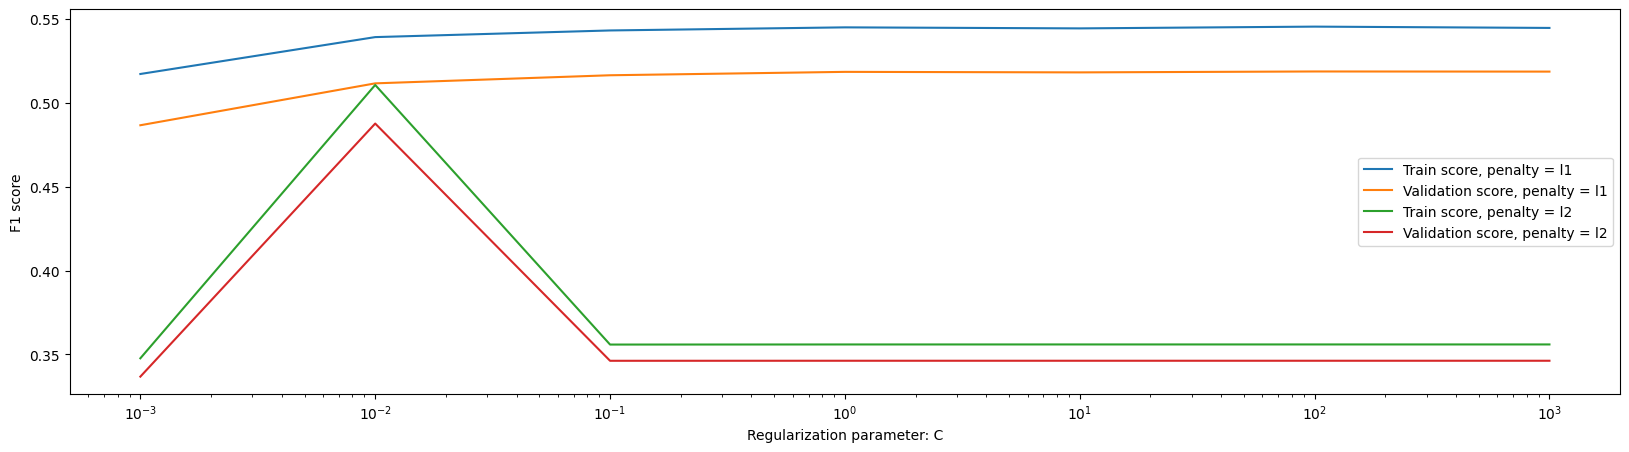

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, val_score_l1, label = 'Validation score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, val_score_l2, label = 'Validation score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F1 score')
plt.xscale('log')

We will train new logistic regression model with C = 0.1 and regularization l1 which produced the best results

In [49]:
# Train logistic regression with C = 0.1, regularization = l1
lreg = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')

lreg1 = lreg.fit(X_train, Y_train)

In [50]:
from sklearn.metrics import classification_report

# Predict performance on validation dataset
y_pred = lreg.predict(X_valid)
print(classification_report(Y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     93580
           1       0.71      0.40      0.52     19715

    accuracy                           0.87    113295
   macro avg       0.80      0.68      0.72    113295
weighted avg       0.86      0.87      0.85    113295



In [51]:
# Predict performance on test dataset
y_pred_test = lreg.predict(X_test)
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92    200254
           1       0.71      0.40      0.51     42521

    accuracy                           0.87    242775
   macro avg       0.80      0.68      0.72    242775
weighted avg       0.85      0.87      0.85    242775



In [52]:
print("F1 score (macro):",f1_score(Y_test, y_pred_test, average = 'macro'))

F1 score (macro): 0.7175524269445437


In [53]:
import h2o
h2o.init(max_mem_size = "4G")            
h2o.remove_all()      

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from C:\Users\Asus\virtualenvn\ml-spring-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Asus\AppData\Local\Temp\tmpdrh79ipw
  JVM stdout: C:\Users\Asus\AppData\Local\Temp\tmpdrh79ipw\h2o_Asus_started_from_python.out
  JVM stderr: C:\Users\Asus\AppData\Local\Temp\tmpdrh79ipw\h2o_Asus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_Asus_csnomd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [54]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import os

In [55]:
# Convert pandas df to H2o frame
train_frame = h2o.H2OFrame(X_train.join(Y_train.reset_index(drop=True)))
val_frame = h2o.H2OFrame(X_valid.join(Y_valid.reset_index(drop=True)))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [56]:
#Prepare predictors and response columns
covtype_X = train_frame.col_names[:-1]
covtype_y = train_frame.col_names[-1]

In [57]:
# Train model using glm
glm = H2OGeneralizedLinearEstimator(
                  model_id='glm_v1',
                  family='binomial',
                  solver='L_BFGS',
                  alpha=0,
                  lambda_=0.5)

In [58]:
glm.train(covtype_X, covtype_y, training_frame=train_frame, validation_frame=val_frame)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v1


GLM Model: summary
    family    link    regularization          number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.5 )  42                            42                             6                       Key_Frame__upload_86c5421f8dea9d0abd6051f1988947f0.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12087226235780908
RMSE: 0.3476668841834222
LogLoss: 0.3907500706069222
AUC: 0.8182591873505772
AUCPR: 0.5922071957389679
Gini: 0.6365183747011545
Null degrees of freedom: 453177
Residual degrees of freedom: 453135
Null deviance: 421254.49689279275
Residual deviance: 354158.67099500756
AIC: 354244.67099500756

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2716932953362006
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      349033  24531  0.0657   (24531.0/373564.0)
1      40490   39124  0.5086   (40490.0/79614.0)
Total  389523  63655  0.1435   (65021.0/453178.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.271693     0.546161  127
max f2                       0.178884     0.619344  228
max f0point5                 0.308704     0.623944  95
max accuracy                 0.308704     0.868017  95
max precision                0.551129     1         0
max recall                   0.0337479    1         398
max specificity              0.551129     1         0
max absolute_mcc             0.288691     0.474364  112
max min_per_class_accuracy   0.196742     0.734021  207
max mean_per_class_accuracy  0.214305     0.735933  186
max tns                      0.551129     373564    0
max fns                      0.551129     79609     0
max fps                      0.0261365    373564    399
max tps                      0.0337479    79614     398
max tnr                      0.551129     1         0
max fnr                      0.551129     0.999937  0
max fpr                      0.0261365    1         399
max tpr                      0.0337479    1         398

Gains/Lift Table: Avg response rate: 17.57 %, avg score: 17.56 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100005                   0.394979           5.19858   5.19858            0.913283         0.419521   0.913283                    0.419521            0.0519883       0.0519883                  419.858   419.858            0.0509363
2        0.020001                    0.374819           5.03153   5.11506            0.883936         0.384143   0.89861                     0.401832            0.0503178       0.102306                   403.153   411.506            0.099846
3        0.0300015                   0.360854           4.86072   5.03028            0.853928         0.367549   0.883716                    0.390404            0.0486095       0.150916                   386.072   403.028            0.146683
4        0.0400019                   0.350009           4.61329   4.92603            0.810459         0.35529    0.865402                    0.381626            0.0461351       0.197051            

In [59]:
from h2o.grid.grid_search import H2OGridSearch
params = {'alpha': [0, 0.2, 0.4, 0.6, 0.8, 1], 'lambda': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

# Create estimators for grid search
glm_grid = H2OGeneralizedLinearEstimator(family='binomial', nfolds=5, fold_assignment='Stratified', seed=1)

# Train grid of models
grid = H2OGridSearch(glm_grid, params)

grid.train(covtype_X, covtype_y, training_frame=train_frame, validation_frame=val_frame)

# Get best model from grid search
best_model = grid.get_grid(sort_by='F1', decreasing=True)[0]

# Evaluate F1 score on validation data
perf = best_model.model_performance(val_frame)
f1_score = perf.F1()


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [60]:
print(f1_score)

[[0.32494943695280143, 0.5700009845426799]]


The F1 score of logistic regression on test dataset is 0.84. The f1 score from GLM model is 0.54. So, we will choose the logistic regression model

## Model Tuning



In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


# Define the hyperparameter search space
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga'],
              'class_weight': [None, 'balanced'],
              'max_iter': [100, 500]}

# Perform grid search with cross-validation on the training set
grid = GridSearchCV(lreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, Y_train)

# Get the best model and its performance on the validation set
best_lreg = grid.best_estimator_
best_lreg.fit(X_train, Y_train)
f1_val_score = f1_score(Y_valid, best_lreg.predict(X_valid), average='macro')

# Get the probability threshold to maximize F1 on the testing set
probs = best_lreg.predict_proba(X_test)[:, 1]
thresholds = np.arange(0, 1, 0.01)
f1_test_scores = [f1_score(Y_test, probs > threshold) for threshold in thresholds]
best_threshold = thresholds[np.argmax(f1_test_scores)]


In [62]:
print(max(f1_test_scores))

0.5679373825634878


In [63]:
best_threshold

0.33

In [64]:
best_lreg

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [65]:
lreg2 = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear')

lreg3 = lreg.fit(X_train, Y_train)

In [66]:
# Predict performance on validation dataset
y_pred3 = lreg3.predict(X_valid)
print(classification_report(Y_valid, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92     93580
           1       0.71      0.40      0.52     19715

    accuracy                           0.87    113295
   macro avg       0.80      0.69      0.72    113295
weighted avg       0.86      0.87      0.85    113295



In [67]:
y_pred4 = lreg3.predict(X_test)

In [68]:
print("F1 score (macro) on validation dataset:",f1_score(Y_valid, y_pred3, average = 'macro'))
print("F1 score (macro) on test dataset:",f1_score(Y_test, y_pred4, average = 'macro'))

F1 score (macro) on validation dataset: 0.7200062845067552
F1 score (macro) on test dataset: 0.7178306499238549


## ==============================================

In [69]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_lreg, f)

# Save the one-hot encoder
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Save the WOE encoder
with open('woe_encoder.pkl', 'wb') as f:
    pickle.dump(woe_encoder, f)


In [70]:
# Load the trained model
with open('model.pkl', 'rb') as f:
    best_lreg = pickle.load(f)

# Load the one-hot encoder
with open('onehot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)

# Load the WOE encoder
with open('woe_encoder.pkl', 'rb') as f:
    woe_encoder = pickle.load(f)

In [71]:
Y_valid.to_csv('output_YValid.csv', index=False)

In [78]:
TTK210000_artifacts_dict = {
    "model": best_lreg,
    "one_hot_encoder": ohe,
    "woe_encoder": woe_encoder,
    "Min_Max_Scaler": scaler,
    "threshold": best_threshold
}

In [79]:
TTK210000_artifacts_dict_file = open("TTK210000_artifacts_dict.pkl", "wb")
pickle.dump(obj=TTK210000_artifacts_dict, file=TTK210000_artifacts_dict_file)